In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/diabetes_clean.csv', header = None)

In [ ]:
#Understanding the dataset and changing the features from row0
df.head()
df.columns = df.iloc[0]
df = df[1:]
index_list = []
for index in range(0, len(df)):
  index_list.append(index)
df.index = index_list
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Extracting features and target variable
X = df[["pregnancies", "glucose", "insulin", "bmi"]].values
y = df["diabetes"].values
print(X.shape, y.shape)

(768, 4) (768,)


In [ ]:
#Fitting the classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
#Predicting on an instance of unlabeled data
X_new = [[1, 85, 0, 30]]
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))


Predictions: ['0']


In [ ]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predicting accuracy
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

In [ ]:
#Predicting accuracies for different k-values
train_accuracies = {}
test_accuracies = {}
neighbours_values = np.arange(1, 26)
for k in neighbours_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracies[k] = knn.score(X_train, y_train)
  test_accuracies[k] = knn.score(X_test, y_test)




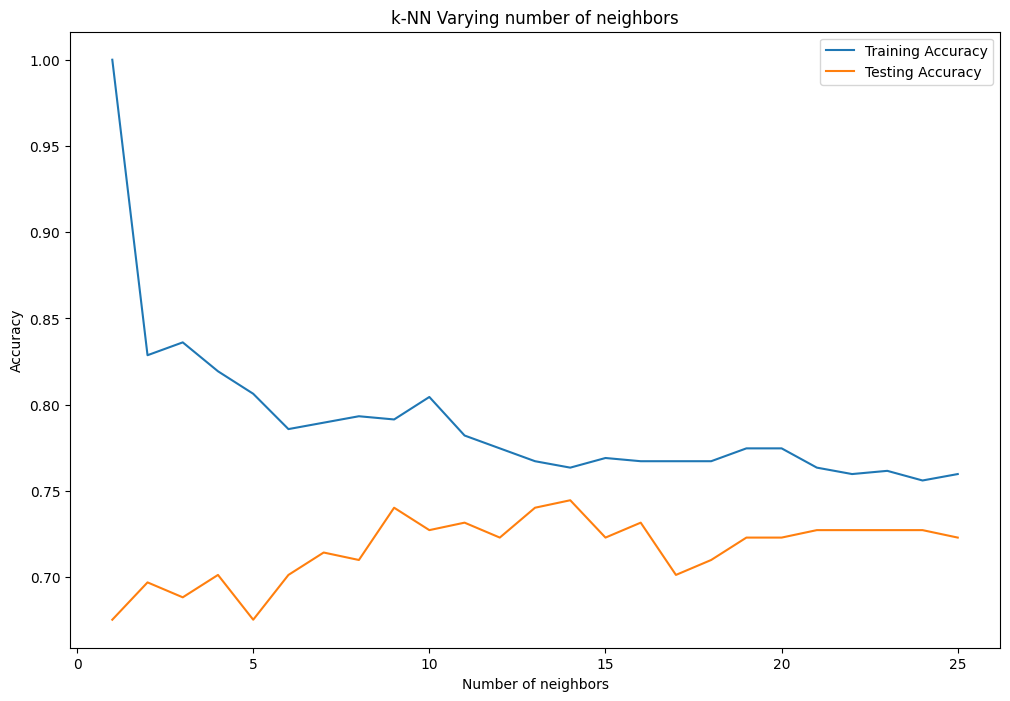

In [ ]:
#Affect of neighbours values on accuracies with data visualisation
plt.figure(figsize=(12, 8))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours_values, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbours_values, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()